In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
products =pd.DataFrame(pd.read_csv('metadata.csv'))
cops=pd.DataFrame(pd.read_csv('cops.csv'))

In [3]:
products.head()

id                                              title group  salesrank  \
0   1            Patterns of Preaching: A Sermon Sampler  Book   396585.0   
1   2                         Candlemas: Feast of Flames  Book   168596.0   
2   3   World War II Allied Fighter Planes Trading Cards  Book  1270652.0   
3   4  Life Application Bible Commentary: 1 and 2 Tim...  Book   631289.0   
4   5    Prayers That Avail Much for Business: Executive  Book   455160.0   

   review_cnt  downloads  rating  
0           2          2     5.0  
1          12         12     4.5  
2           1          1     5.0  
3           1          1     4.0  
4           0          0     0.0

In [4]:
cops.head()

Source  Target
0       1       2
1       1       4
2       1       5
3       1      15
4       2      11

In [5]:
g = nx.from_pandas_edgelist(cops, 'Source', 'Target')

In [6]:
products.group.unique()

array(['Book', 'Music', 'DVD', 'Video', 'Toy', 'Video Games', 'Software',
       'Baby Product', 'CE'], dtype=object)

In [7]:
# create dfs for categories
books=products[(products['group']=='Book')]
books_cops=cops[cops.Source.isin(books.id) & cops.Target.isin(books.id)]
g_books = nx.from_pandas_edgelist(books_cops, 'Source', 'Target')

music=products[(products['group']=='Music')]
music_cops=cops[cops.Source.isin(music.id) & cops.Target.isin(music.id)]
g_music = nx.from_pandas_edgelist(music_cops, 'Source', 'Target')

dvds=products[(products['group']=='DVD')]
dvds_cops=cops[cops.Source.isin(dvds.id) & cops.Target.isin(dvds.id)]
g_dvds = nx.from_pandas_edgelist(dvds_cops, 'Source', 'Target')

videos=products[(products['group']=='Video')]
videos_cops=cops[cops.Source.isin(videos.id) & cops.Target.isin(videos.id)]
g_videos = nx.from_pandas_edgelist(videos_cops, 'Source', 'Target')

dvds_videos_cops=cops[cops.Source.isin(pd.concat([videos.id, dvds.id])) & cops.Target.isin(pd.concat([videos.id, dvds.id]))]
g_dvds_videos = nx.from_pandas_edgelist(dvds_videos_cops, 'Source', 'Target')
print("num books:", len(books.index))
print("num music:", len(music.index))
print("num dvds:", len(dvds.index))
print("num videos:", len(videos.index))

num books: 188013
num music: 48993
num dvds: 9554
num videos: 12597


# Look at centrality measures

## Degree

In [36]:
def get_degree(g):
    nodes = [node for (node, val) in g.degree()]
    degrees = [val for (node, val) in g.degree()]
    d = np.array(degrees)

    print("min degree:", min(d), ",node id: ", nodes[np.argmin(d)]) # prob more than 1
    print("max degree:", max(d), ",node id: ", nodes[np.argmax(d)], products[products['id'] == nodes[np.argmax(d)]])
    print("mean degree:", np.mean(d))
    print("median degree:", np.median(d))
    
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    ax.set_yscale('log')
    ax.set_xlabel('degree centrality')
    ax.set_ylabel('log(count)')
#     ax.hist(d, weights=np.ones(len(d)) / len(d))
    ax.hist(d)

In [26]:
max_centrality_prod = products[products['id'] == nodes[np.argmax(d)]]
max_centrality_prod

id                   title group  salesrank  review_cnt  downloads  \
14805  14949  Fodor's Australia 2000  Book   793062.0           1          1   

       rating  
14805     5.0

min degree: 1 ,node id:  289
max degree: 420 ,node id:  14949
mean degree: 6.865720499027126
median degree: 6.0


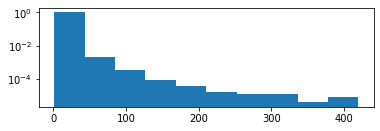

In [29]:
get_degree(g)

min degree: 1 ,node id:  300
max degree: 309 ,node id:  14949
mean degree: 4.990120711050944
median degree: 4.0


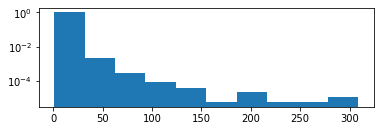

In [30]:
get_degree(g_books)

min degree: 1 ,node id:  208
max degree: 62 ,node id:  10519
mean degree: 1.897109793474836
median degree: 2.0


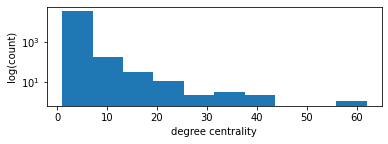

In [10]:
get_degree(g_music)

min degree: 1 ,node id:  44
max degree: 8 ,node id:  12615           id             title group  salesrank  review_cnt  downloads  rating
12496  12615  My Louisiana Sky   DVD    23233.0           5          5     4.5
mean degree: 1.376510067114094
median degree: 1.0


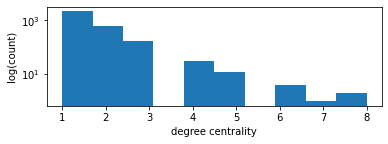

In [14]:
get_degree(g_dvds)

min degree: 1 ,node id:  410
max degree: 10 ,node id:  40546           id         title  group  salesrank  review_cnt  downloads  rating
40084  40546  Lovin' Molly  Video     2196.0           2          2     3.0
mean degree: 1.2547887693518762
median degree: 1.0


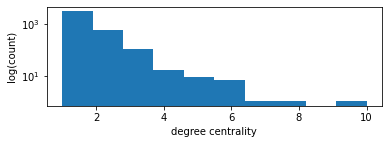

In [15]:
get_degree(g_videos)

## Betweeness

In [8]:
def get_betweenness(g):
    betweenness = nx.betweenness_centrality(g)
    nodes = list(betweenness.keys())
    b = list(betweenness.values())
    i = max(betweenness, key=betweenness.get)
    
    print("min:", min(b)) # prob more than 1
    print("max:", max(b), ",node id: ", i, products[products['id'] == i])
    print("mean:", np.mean(b))
    print("median:", np.median(b))

    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    ax.set_yscale('log')
    ax.set_xlabel('betweenness centrality')
    ax.set_ylabel('log(count)')
    ax.hist(b)

min: 0.0
max: 1.4428287017404797e-05 ,node id:  12615           id             title group  salesrank  review_cnt  downloads  rating
12496  12615  My Louisiana Sky   DVD    23233.0           5          5     4.5
mean: 9.464024254809879e-08
median: 0.0


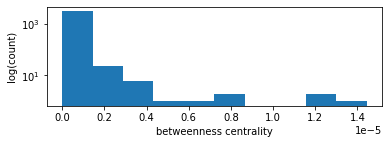

In [41]:
get_betweenness(g_dvds)

min: 0.0
max: 1.8604920381276835e-05 ,node id:  10745           id                                              title  group  \
10646  10745  Popeye - The Sailor: When Popeye Ruled the Sev...  Video   

       salesrank  review_cnt  downloads  rating  
10646    13414.0           1          1     5.0  
mean: 6.773184033379306e-08
median: 0.0


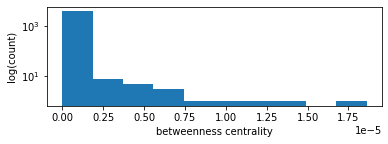

In [39]:
get_betweenness(g_videos)

In [9]:
get_betweenness(g_dvds_videos)

KeyboardInterrupt: 

## Closeness

In [45]:
def get_closeness(g):
    closeness = nx.closeness_centrality(g)
    nodes = list(closeness.keys())
    c = list(closeness.values())
    i = max(closeness, key=closeness.get)
    
    print("min:", min(c)) # prob more than 1
    print("max:", max(c), ",node id: ", i, products[products['id'] == i])
    print("mean:", np.mean(c))
    print("median:", np.median(c))

    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    ax.set_yscale('log')
    ax.set_xlabel('closeness centrality')
    ax.set_ylabel('log(count)')
    ax.hist(c)

min: 0.0003356831151393085
max: 0.003151691469919063 ,node id:  12615           id             title group  salesrank  review_cnt  downloads  rating
12496  12615  My Louisiana Sky   DVD    23233.0           5          5     4.5
mean: 0.0005255372904923821
median: 0.0003356831151393085


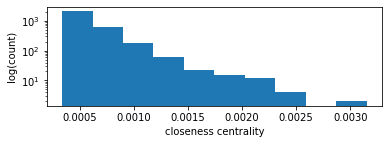

In [46]:
get_closeness(g_dvds)

min: 0.00026246719160104987
max: 0.0027996500437445318 ,node id:  40546           id         title  group  salesrank  review_cnt  downloads  rating
40084  40546  Lovin' Molly  Video     2196.0           2          2     3.0
mean: 0.00037875249713989283
median: 0.00026246719160104987


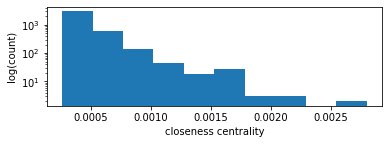

In [47]:
get_closeness(g_videos)

In [ ]:
# look at gatekeepers

In [ ]:
# look at cycles

## Visualizations

In [54]:
# visualization of graph
from pyvis.network import Network
net = Network(notebook = True)
net.from_nx(g_dvds)
net.show("example.html")

In [53]:
from pyvis.network import Network

net = Network(notebook = True)
net.from_nx(g_videos)
net.show("example.html")
# colors = ["blue"]*len(videos.index)
# nx.draw_spring(g_videos, node_size = 2, with_labels=False)

In [55]:
dvds_videos_cops=cops[cops.Source.isin(pd.concat([videos.id, dvds.id])) & cops.Target.isin(pd.concat([videos.id, dvds.id]))]
g_dvds_videos = nx.from_pandas_edgelist(dvds_videos_cops, 'Source', 'Target')
net = Network(notebook = True)
net.from_nx(g_dvds_videos)
net.show("example.html")

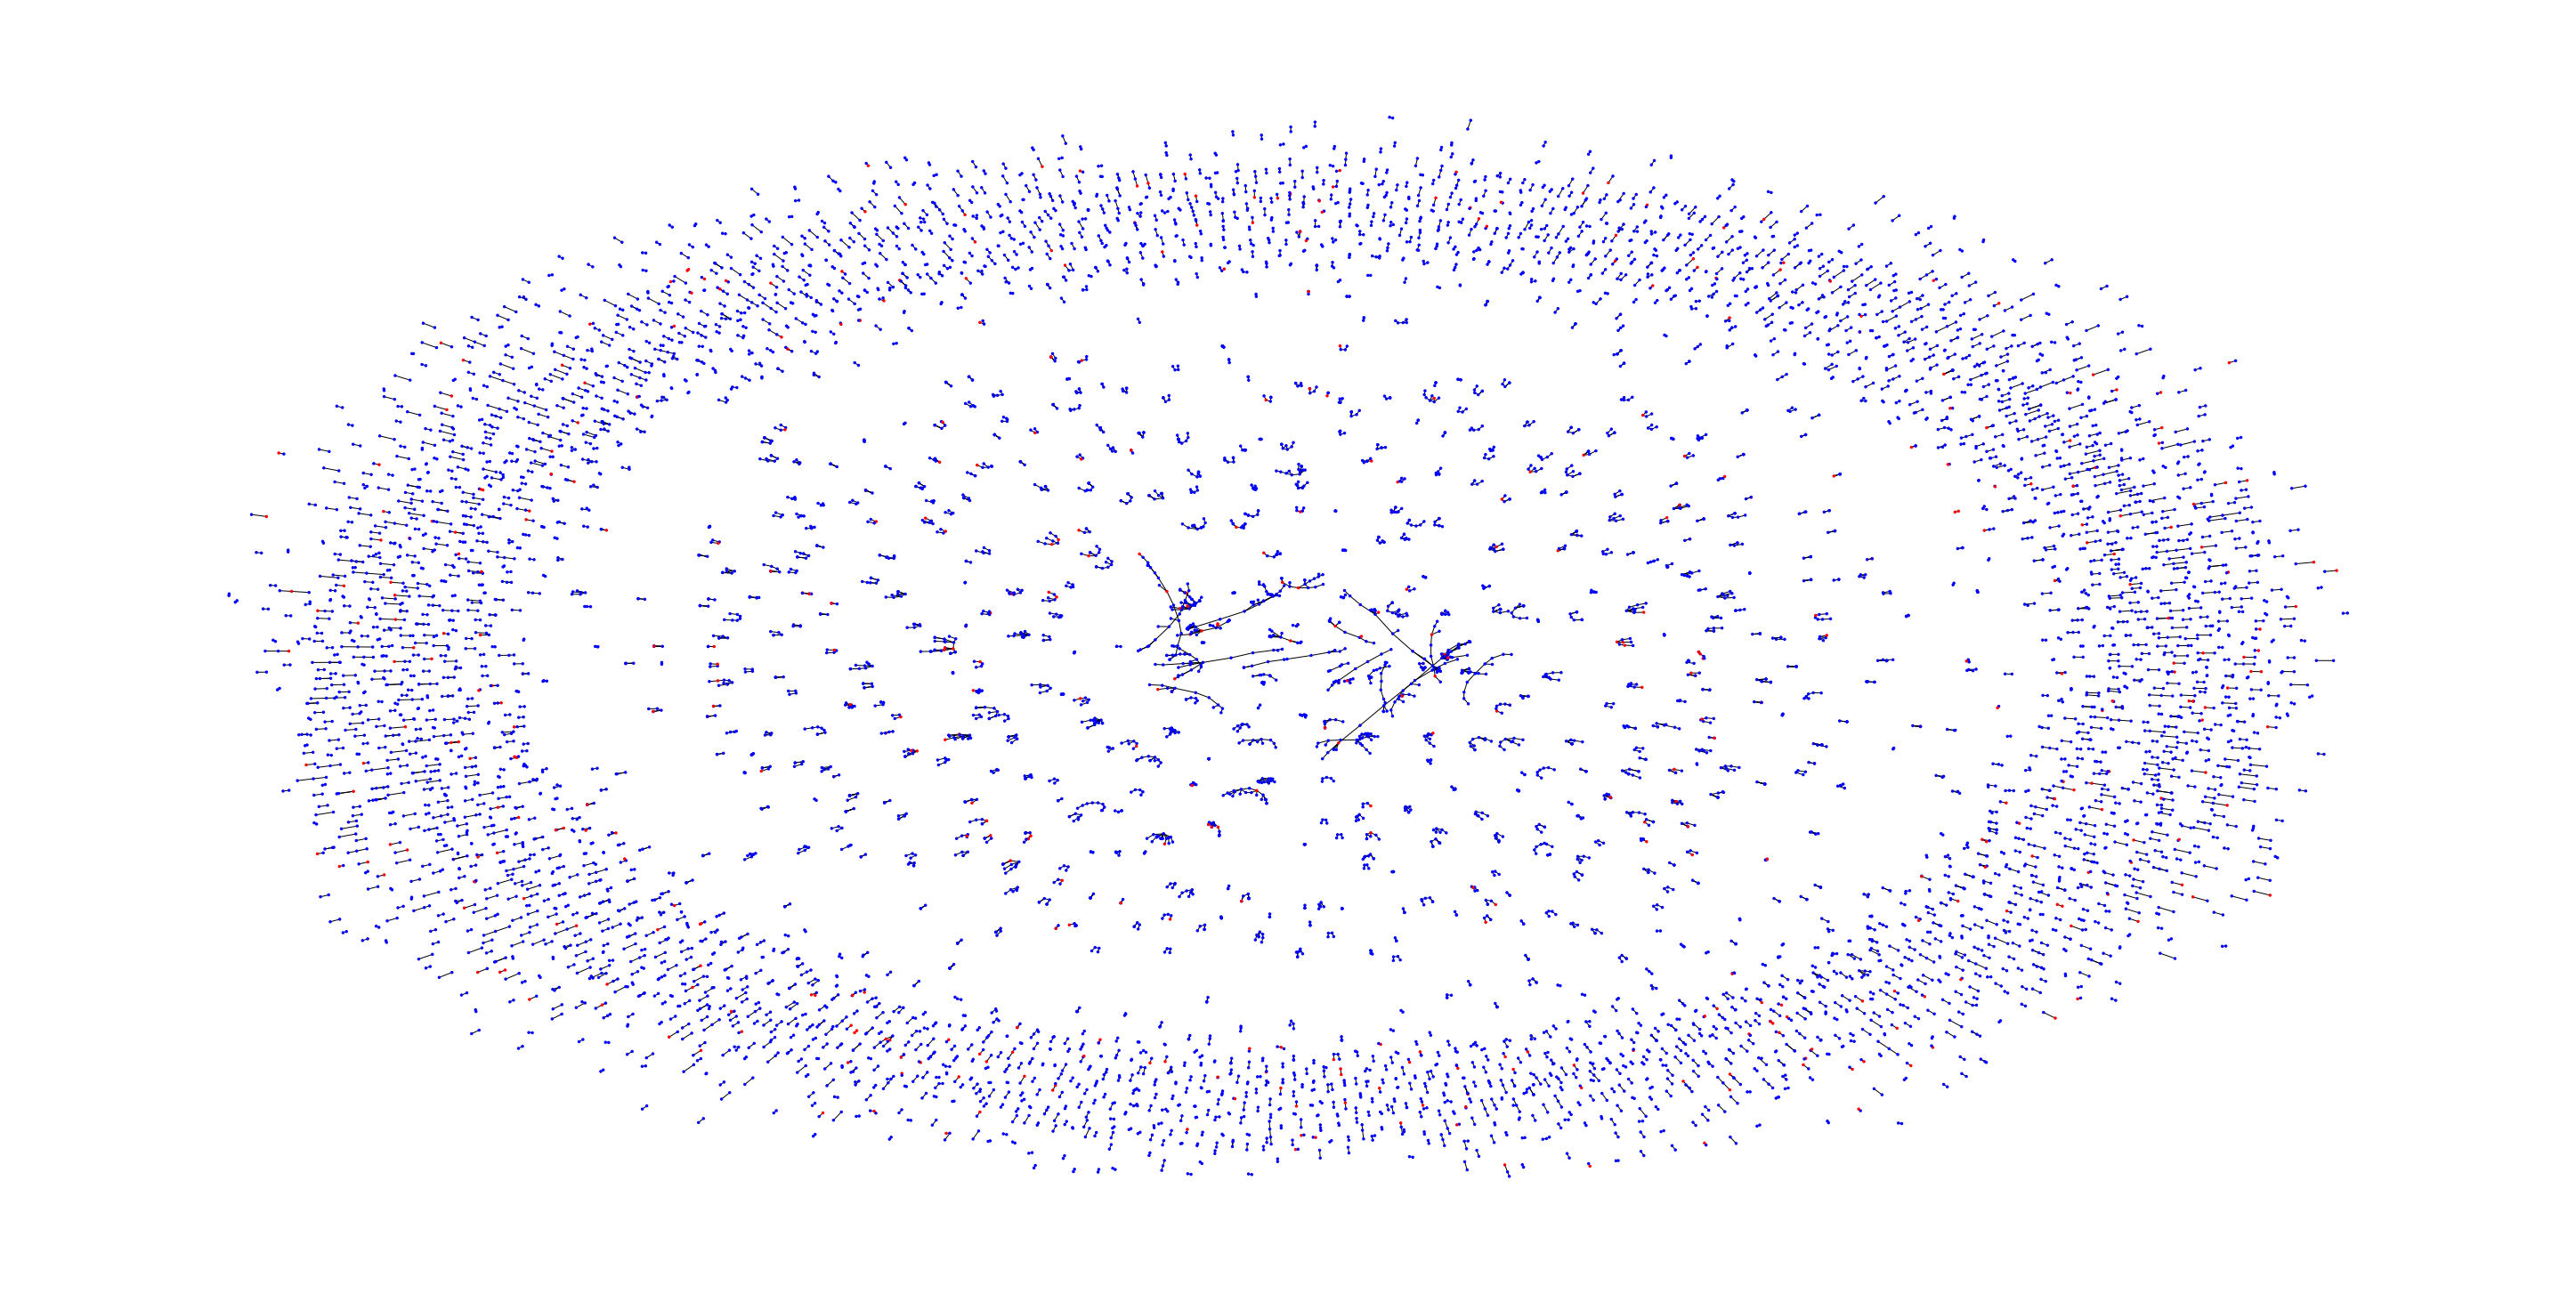

In [72]:
color_map = []
for node in g_dvds_videos:
    if node in videos.id:
        color_map.append('red')
    else: 
        color_map.append('blue') 

fig = plt.figure(figsize=(40,20))
nx.draw(g_dvds_videos, node_size=6, node_color=color_map)

## Giant Connected Component

In [10]:
Gcc = sorted(nx.connected_components(g_dvds_videos), key=len, reverse=True)
G0 = g_dvds_videos.subgraph(Gcc[0])

In [21]:
print(G0)

Graph with 52 nodes and 56 edges


In [32]:
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
G0 = g.subgraph(Gcc[0])

In [33]:
print(G0)

Graph with 262110 nodes and 899787 edges


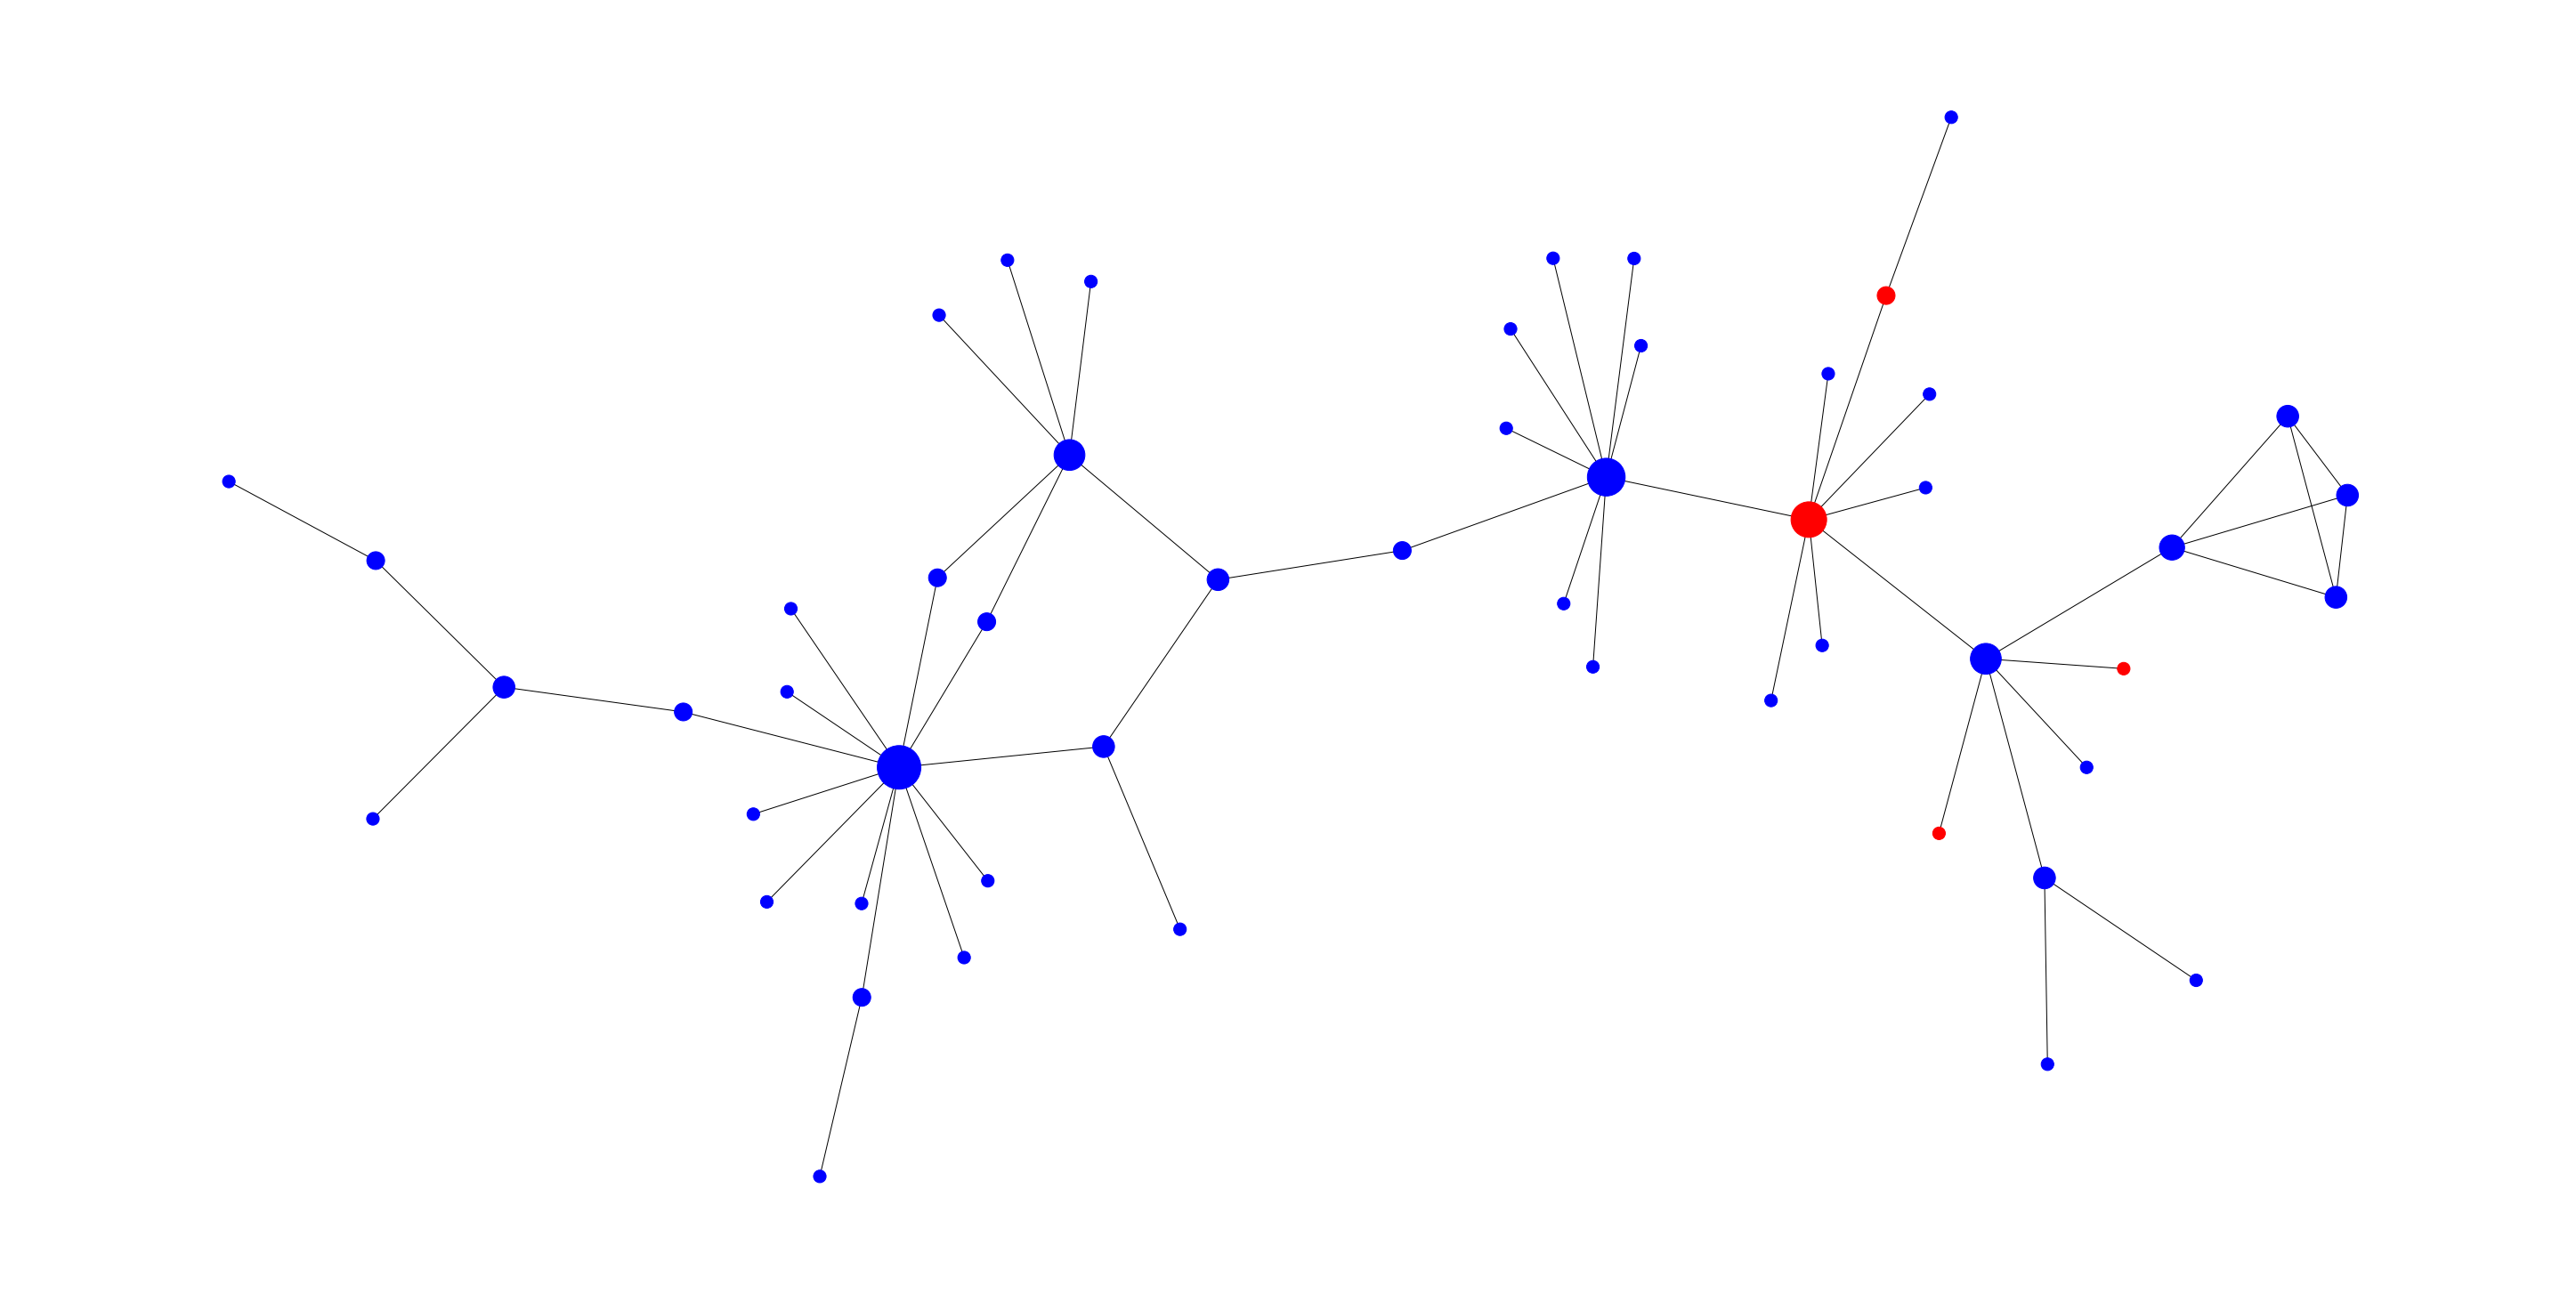

In [28]:
color_map = []
degrees = [val for (node, val) in G0.degree()]

for node in G0:
    if node in videos.id:
        color_map.append('red')
    else: 
        color_map.append('blue')

fig = plt.figure(figsize=(40,20))
nx.draw_kamada_kawai(G0, node_size=[element * 200 for element in degrees], node_color=color_map)

In [ ]:
get_degree(g)

In [10]:
print(g_dvds_videos)

Graph with 10245 nodes and 7555 edges


In [12]:
nodes = [node for (node, val) in G0.degree()]
print(sorted(nodes))

[21, 2436, 3464, 5415, 5452, 6603, 10745, 11159, 12219, 12464, 13634, 14436, 14439, 14444, 14519, 16588, 16652, 16795, 18669, 22737, 23452, 23453, 24444, 24445, 26098, 27986, 36929, 37260, 38734, 38735, 39536, 46666, 49549, 52722, 62107, 69773, 70282, 89764, 96981, 102811, 112733, 112952, 115849, 136464, 139279, 139287, 164734, 183850, 187193, 191902, 194778, 200826]


In [20]:
def get_subset(graph, id):
    subset = nx.node_connected_component(graph, id)
    color_map = []
    for node in g.subgraph(subset):
        if node == id:
            color_map.append('red')
        else: 
            color_map.append('blue')
    nx.draw(g.subgraph(subset), node_color = color_map)

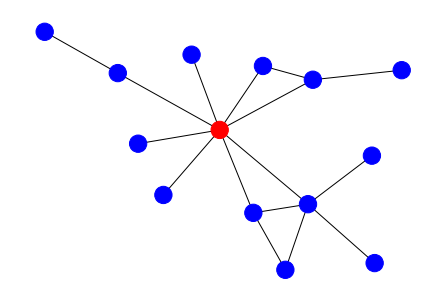

In [12]:
color_map = []
for node in g.subgraph(subset):
    if node == 12615:
        color_map.append('red')
    else: 
        color_map.append('blue')
nx.draw(g.subgraph(subset), node_color = color_map)

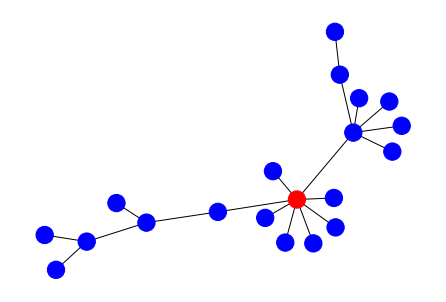

In [21]:
get_subset(g_videos, 10745)